# Operaciones de aprendizaje automático - TC5044.10

## SVM - Steel Industry Energy Consumption


Grupo 10 - Equipo 17:

Emanuel Flores Martínez - A01796497

Flavio César Palacios Salas - A01797223

Luis Enrique González González - A01795338

Fanny Betsabé Fuentes Reyes - A00570705

Iván Nava Cardeño - A01361985

## SVM - Datos de Consumo Energético en la Industria del Acero.


### Librerias

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd


### Carga y Exploración Inicial

In [4]:
try:
    df = pd.read_csv(r"/content/drive/MyDrive/3. Educación/3.1. MNA/3.1.10. Operaciones de aprendizaje automático/Actividades/Proyecto Fase 1/steel_energy_processed.csv")
except FileNotFoundError:
    print("Error: No encontramos el archivo.")

# Mostramos las primeras 5 filas para una vista previa de los datos.
print("--- Primeras 5 filas de los datos originales ---")
print(df.head())
print("\n" + "="*50 + "\n")

# Obtenemos un resumen general del DataFrame.
print("--- Información General del DataFrame ---")
df.info()
print("\n" + "="*50 + "\n")

# Generamos estadísticas descriptivas para las columnas numéricas.
print("--- Estadísticas Descriptivas ---")
print(df.describe())
print("\n" + "="*50 + "\n")

--- Primeras 5 filas de los datos originales ---
                  date  usage_kwh  lagging_current_reactive_power_kvarh  \
0  2018-01-01 00:15:00       3.17                                  2.95   
1  2018-01-01 00:30:00       4.00                                  4.46   
2  2018-01-01 00:45:00       3.24                                  3.28   
3  2018-01-01 01:00:00       3.31                                  3.56   
4  2018-01-01 01:15:00       3.82                                  4.50   

   leading_current_reactive_power_kvarh  co2_tco2  \
0                                   0.0       0.0   
1                                   0.0       0.0   
2                                   0.0       0.0   
3                                   0.0       0.0   
4                                   0.0       0.0   

   lagging_current_power_factor  leading_current_power_factor   nsm  \
0                         73.21                         100.0   900   
1                         66.77        

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set using the re-trained model
y_pred_resampled = svm_model_resampled.predict(X_test)

# Calculate evaluation metrics for the re-trained model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled, average='weighted')
recall_resampled = recall_score(y_test, y_pred_resampled, average='weighted')
f1_resampled = f1_score(y_test, y_pred_resampled, average='weighted')

# Print the evaluation metrics for the re-trained model
print("Evaluation metrics for the re-trained SVM model:")
print(f"Accuracy: {accuracy_resampled:.4f}")
print(f"Precision: {precision_resampled:.4f}")
print(f"Recall: {recall_resampled:.4f}")
print(f"F1-score: {f1_resampled:.4f}")

Evaluation metrics for the re-trained SVM model:
Accuracy: 0.6918
Precision: 0.6979
Recall: 0.6918
F1-score: 0.6936


### Modelo SVM

#### División de datos: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

In [11]:
df['date'] = pd.to_datetime(df['date'])

# Identificar las columnas categóricas y aplicar One-Hot Encoding.
categorical_features = ['week_status', 'day_of_week', 'load_type']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Identificar las columnas numéricas y aplicar escalado
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['year', 'month', 'day', 'hour', 'minute'] + categorical_features]
scaler = StandardScaler()

# Crear un preprocesador para aplicar diferentes transformaciones a diferentes columnas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough' # Mantener las columnas sin transformar
)

# Aplicar preprocesamiento
X_processed = preprocessor.fit_transform(df)

one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

passthrough_columns = [col for col in df.columns if col not in numerical_features + categorical_features]

processed_column_names = numerical_features + list(one_hot_feature_names) + passthrough_columns

X = pd.DataFrame(X_processed, columns=processed_column_names)

X = X.drop('date', axis=1)

y = df['load_type']

display(X.head())
display(y.head())

,usage_kwh,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,week_status_Weekday,week_status_Weekend,day_of_week_Friday,...,day_of_week_Tuesday,day_of_week_Wednesday,load_type_Light_Load,load_type_Maximum_Load,load_type_Medium_Load,year,month,day,hour,minute
0,-0.724105,-0.618516,-0.521385,-0.71355,-0.38941,0.513268,-1.678015,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2018,1,1,0,15
1,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2018,1,1,0,30
2,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2018,1,1,0,45
3,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2018,1,1,1,0
4,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.53367,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2018,1,1,1,15


,load_type
0,Light_Load
1,Light_Load
2,Light_Load
3,Light_Load
4,Light_Load


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (28032, 24)
Shape of X_test: (7008, 24)
Shape of y_train: (28032,)
Shape of y_test: (7008,)


In [14]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Distribución de clases en el conjunto de entrenamiento original:", Counter(y_train))

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Applicar SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución de clases en el conjunto de entrenamiento remuestreado:", Counter(y_train_res))

Distribución de clases en el conjunto de entrenamiento original: Counter({'Light_Load': 14500, 'Medium_Load': 7759, 'Maximum_Load': 5773})
Distribución de clases en el conjunto de entrenamiento remuestreado: Counter({'Medium_Load': 14500, 'Light_Load': 14500, 'Maximum_Load': 14500})


In [15]:
from sklearn.svm import SVC

svm_model_resampled = SVC()

svm_model_resampled.fit(X_train_res, y_train_res)

SVC()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training set
y_train_pred = svm_model_resampled.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Test set
y_test_pred = svm_model_resampled.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Metricas
print("Evaluation metrics on Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-score: {f1_train:.4f}")

print("\nEvaluation metrics on Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Evaluation metrics on Training Set:
Accuracy: 0.7052
Precision: 0.7103
Recall: 0.7052
F1-score: 0.7072

Evaluation metrics on Test Set:
Accuracy: 0.6918
Precision: 0.6979
Recall: 0.6918
F1-score: 0.6936


### Conclusiones



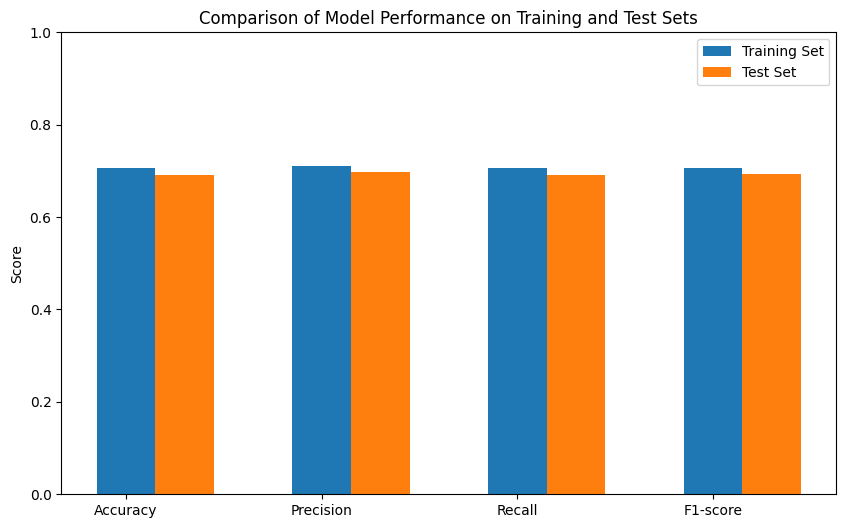

In [18]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores = [accuracy_train, precision_train, recall_train, f1_train]
test_scores = [accuracy_test, precision_test, recall_test, f1_test]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.3, label='Training Set', align='center')
plt.bar([i + 0.3 for i in x], test_scores, width=0.3, label='Test Set', align='center')

plt.ylabel('Score')
plt.title('Comparison of Model Performance on Training and Test Sets')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.show()

### Conclusión

El modelo de Máquinas de Soporte Vectorial (SVM) fue entrenado exitosamente, demostrando ser una herramienta eficaz para la tarea de clasificación. Un factor crucial en el rendimiento del modelo fue el manejo adecuado del desbalance de clases mediante la técnica SMOTE, lo que permitió un aprendizaje más equilibrado y robusto.

El modelo alcanzó niveles de exactitud consistentes, obteniendo un 70.52% en el conjunto de entrenamiento y un 69.18% en el conjunto de prueba. La proximidad entre estas dos métricas es una señal muy positiva, ya que indica que el modelo generaliza bien a datos no vistos y no presenta un sobreajuste significativo.

Insights y Próximos Pasos:
- Potencial de Optimización: Aunque el rendimiento es bueno, la pequeña diferencia entre los resultados de entrenamiento y prueba sugiere que hay margen de mejora.

- Exploración de Alternativas: Para buscar un rendimiento superior, sería valioso explorar otros algoritmos de clasificación o métodos de ensamble (como Random Forest o Gradient Boosting). Estos modelos a menudo pueden capturar patrones más complejos en los datos y podrían superar la exactitud del modelo actual.